In [4]:
#Etapas de configuração para executar o pyspark via Google Colab
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [5]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [6]:
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark
!pip install pyspark

In [8]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [9]:
import findspark
findspark.init()

In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
#simples dataset utilizado
!wget --continue https://raw.githubusercontent.com/GarvitArya/pyspark-demo/main/sample_books.json -O /tmp/sample_books.json

In [14]:
#Leitura em um dataframe do Spark
df = spark.read.json("/tmp/sample_books.json")

In [15]:
#Verificação dos tipos de dados e das colunas
df.printSchema()

root
 |-- author: string (nullable = true)
 |-- edition: string (nullable = true)
 |-- price: double (nullable = true)
 |-- title: string (nullable = true)
 |-- year_written: long (nullable = true)



In [42]:
df.show(6,False)

+--------------------+--------------+-----+----------------+------------+
|author              |edition       |price|title           |year_written|
+--------------------+--------------+-----+----------------+------------+
|Austen, Jane        |Penguin       |18.2 |Northanger Abbey|1814        |
|Tolstoy, Leo        |Penguin       |12.7 |War and Peace   |1865        |
|Tolstoy, Leo        |Penguin       |13.5 |Anna Karenina   |1875        |
|Woolf, Virginia     |Harcourt Brace|25.0 |Mrs. Dalloway   |1925        |
|Cunnningham, Michael|Harcourt Brace|12.35|The Hours       |1999        |
|Twain, Mark         |Penguin       |5.76 |Huckleberry Finn|1865        |
+--------------------+--------------+-----+----------------+------------+
only showing top 6 rows



In [ ]:
df.count()

In [47]:
df.select("author",  "year_written").show(7)

+--------------------+------------+
|              author|year_written|
+--------------------+------------+
|        Austen, Jane|        1814|
|        Tolstoy, Leo|        1865|
|        Tolstoy, Leo|        1875|
|     Woolf, Virginia|        1925|
|Cunnningham, Michael|        1999|
|         Twain, Mark|        1865|
|    Dickens, Charles|        1870|
+--------------------+------------+
only showing top 7 rows



In [34]:
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd

In [35]:
selecao_df = df.select('year_written')#seleção de uma coluna de interesse

In [36]:
filtrado_df = selecao_df.toPandas() #convertendo para um dataframe compativel com pandas

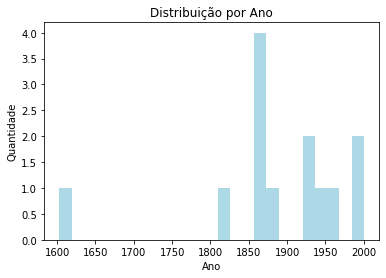

In [37]:
#Definições do gráfico
ax1 = filtrado_df['year_written'].plot(kind='hist', bins=25, facecolor='lightblue') 
ax1.set_title('Distribuição por Ano')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Quantidade')
plt.suptitle('')
plt.show()

O histograma mostra que no intervalo entre 1850 e 1900 ocorreu uma maior frequência de títulos literários do conjunto analisado. 